Общая выручка магазина: 40150 рублей
Максимально распроданный элемент это: Блинный шоколадный торт (26 раз)
Товар, который принес наибольшую выручку это: Блинный шоколадный торт (10400 рублей)
Подробная информация по каждому товару:
1) Блинный шоколадный торт: Продано 26 раз, доля в общей выручке равна 25.9%
2) Ананасовый торт : Продано 12 раз, доля в общей выручке равна 14.94%
3) Морковный торт: Продано 25 раз, доля в общей выручке равна 15.57%
4) Шарлотка: Продано 17 раз, доля в общей выручке равна 8.47%
5) Вишневый пирог: Продано 12 раз, доля в общей выручке равна 17.93%
6) Осетинский пирог: Продано 23 раз, доля в общей выручке равна 17.19%


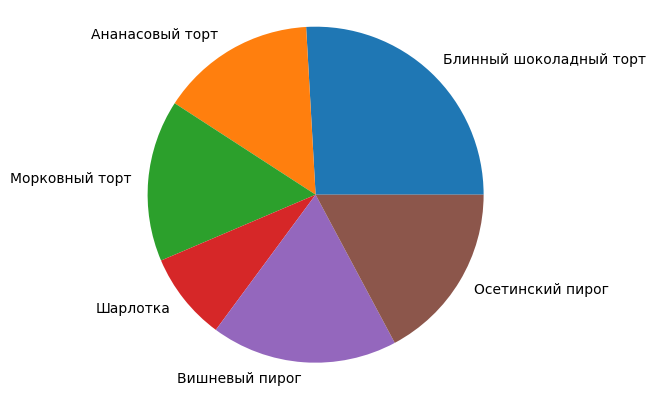

In [1]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

total_income = 0


#Алгоритм сортировки пузырьком
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break


#Алгоритм сортировки вставкой
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


#Рассчет общей выручки магазина
with open('Belov_data.csv', 'r', encoding='windows-1251') as csv_file:
  rows = list(csv.reader(csv_file, delimiter = ";"))[1:]
  for row in rows:
    total_income += int(row[6])


  #Нахождение самого распродаваемого товара
  items_sold = [int(row[4]) for row in rows]
  items_sold_1 = items_sold.copy()
  bubble_sort(items_sold) #Использование пузырьковой сортировки
  max_item = items_sold[-1]
  item_index = items_sold_1.index(max_item)
  item_name = rows[item_index][2]


  #Нахождение товара, который принес наибольшую выручку
  items_sold_income = [int(row[6]) for row in rows]
  items_sold_income_1 = items_sold_income.copy()
  insertion_sort(items_sold_income) #Использование сортировки вставкой
  max_item1 = items_sold_income[-1]
  item_index_income = items_sold_income_1.index(max_item1)
  item_name1 = rows[item_index_income][2]


#Вывод отчёта
print(f"Общая выручка магазина: {total_income} рублей")
print(f"Максимально распроданный элемент это: {item_name} ({max_item} раз)")
print(f"Товар, который принес наибольшую выручку это: {item_name1} ({max_item1} рублей)")
print("Подробная информация по каждому товару:")
for row in rows:
  print(f"{row[0]}) {row[2]}: Продано {row[4]} раз, доля в общей выручке равна {round((int(row[6])/total_income)*100, 2)}%")


slovar = {}
for row in rows:
  slovar[row[2]] = round(int(row[-1]) * 100 / total_income, 2)
values = list(slovar.values())
labels = list(slovar.keys())


#Рисование диаграммы
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels)
ax1.axis('equal')
plt.show()